In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
!pip install wordcloud


In [3]:
import nltk
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer


from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping


Using TensorFlow backend.


In [4]:
# KERAS
SEQUENCE_LENGTH =300
EPOCHS = 8
BATCH_SIZE = 1024

In [22]:
import re
from wordcloud import WordCloud, STOPWORDS 


DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"

In [38]:
df=pd.read_csv("/home/rishabh/NLP/hate speech/data.csv",encoding =DATASET_ENCODING , names=DATASET_COLUMNS)

In [39]:
df.shape

(1600000, 6)

In [40]:
df.head(10)

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [41]:
df[df['target']==0]

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
799995,0,2329205009,Thu Jun 25 10:28:28 PDT 2009,NO_QUERY,dandykim,Sick Spending my day laying in bed listening ...
799996,0,2329205038,Thu Jun 25 10:28:28 PDT 2009,NO_QUERY,bigenya,Gmail is down?
799997,0,2329205473,Thu Jun 25 10:28:30 PDT 2009,NO_QUERY,LeeLHoke,rest in peace Farrah! So sad
799998,0,2329205574,Thu Jun 25 10:28:30 PDT 2009,NO_QUERY,davidlmulder,@Eric_Urbane Sounds like a rival is flagging y...


In [42]:
df[df['target']==4]

,target,ids,date,flag,user,text
800000,4,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!
800001,4,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...
800002,4,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,4,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...
800004,4,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [43]:
df.describe()

,target,ids
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [44]:
decode_map = {0: "HATE", 4: "NON HATE"}
def decode_sentiment(label):
    return decode_map[int(label)]

In [45]:
df.target = df.target.apply(lambda x: decode_sentiment(x))


In [46]:
df['target'].unique()

array(['HATE', 'NON HATE'], dtype=object)

In [ ]:
df[]

In [8]:
stop_words=stopwords.words("english")
stemmer = SnowballStemmer("english",ignore_stopwords=True)

In [9]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [10]:
#train_df= train_df.iloc[1900:2000,:]

TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

def preprocess(text,stem= True):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            tokens.append(stemmer.stem(token))
            

    return " ".join(tokens)

In [11]:
train_df['tweet1'] = train_df['tweet'].apply(lambda text: preprocess(text))
train_df.head(15)

,label,tweet,tweet1
id,,,
1,0,@user when a father is dysfunctional and is s...,user father dysfunct selfish drag kid dysfunct...
2,0,@user @user thanks for #lyft credit i can't us...,user thank lyft credit use caus offer wheelcha...
3,0,bihday your majesty,bihday majesti
4,0,#model i love u take with u all the time in ...,model love u take u time ur
5,0,factsguide: society now #motivation,factsguid societi motiv
6,0,[2/2] huge fan fare and big talking before the...,2 2 huge fan fare big talk leav chao pay dispu...
7,0,@user camping tomorrow @user @user @user @use...,user camp tomorrow user user user user user us...
8,0,the next school year is the year for exams.ð...,next school year year exam think school exam h...
9,0,we won!!! love the land!!! #allin #cavs #champ...,love land allin cav champion cleveland clevela...


In [12]:
documents = [tweet.split() for tweet in train_df.tweet1] 
documents

[['user', 'father', 'dysfunct', 'selfish', 'drag', 'kid', 'dysfunct', 'run'],
 ['user',
  'thank',
  'lyft',
  'credit',
  'use',
  'caus',
  'offer',
  'wheelchair',
  'van',
  'pdx',
  'disapoint',
  'getthank'],
 ['bihday', 'majesti'],
 ['model', 'love', 'u', 'take', 'u', 'time', 'ur'],
 ['factsguid', 'societi', 'motiv'],
 ['2',
  '2',
  'huge',
  'fan',
  'fare',
  'big',
  'talk',
  'leav',
  'chao',
  'pay',
  'disput',
  'get',
  'allshowandnogo'],
 ['user',
  'camp',
  'tomorrow',
  'user',
  'user',
  'user',
  'user',
  'user',
  'user',
  'user',
  'danni'],
 ['next',
  'school',
  'year',
  'year',
  'exam',
  'think',
  'school',
  'exam',
  'hate',
  'imagin',
  'actorslif',
  'revolutionschool',
  'girl'],
 ['love', 'land', 'allin', 'cav', 'champion', 'cleveland', 'clevelandcavali'],
 ['user', 'user', 'welcom', 'gr8'],
 ['ireland',
  'consum',
  'price',
  'index',
  'mom',
  'climb',
  'previous',
  '0',
  '2',
  '0',
  '5',
  'may',
  'blog',
  'silver',
  'gold',
  'f

In [13]:
model = Word2Vec(documents)
words = model.wv.vocab
words

{'user': <gensim.models.keyedvectors.Vocab at 0x7fbc5fededd0>,
 'father': <gensim.models.keyedvectors.Vocab at 0x7fbc5fedea10>,
 'selfish': <gensim.models.keyedvectors.Vocab at 0x7fbc5fedeb90>,
 'drag': <gensim.models.keyedvectors.Vocab at 0x7fbc5fede950>,
 'kid': <gensim.models.keyedvectors.Vocab at 0x7fbc5fedec50>,
 'run': <gensim.models.keyedvectors.Vocab at 0x7fbc5feded90>,
 'thank': <gensim.models.keyedvectors.Vocab at 0x7fbc5fedee90>,
 'lyft': <gensim.models.keyedvectors.Vocab at 0x7fbc5fedef90>,
 'credit': <gensim.models.keyedvectors.Vocab at 0x7fbc5fedeb50>,
 'use': <gensim.models.keyedvectors.Vocab at 0x7fbc5fede990>,
 'caus': <gensim.models.keyedvectors.Vocab at 0x7fbc5fedef50>,
 'offer': <gensim.models.keyedvectors.Vocab at 0x7fbc5fedee50>,
 'van': <gensim.models.keyedvectors.Vocab at 0x7fbc5fedefd0>,
 'bihday': <gensim.models.keyedvectors.Vocab at 0x7fbc5fede850>,
 'majesti': <gensim.models.keyedvectors.Vocab at 0x7fbc5fede910>,
 'model': <gensim.models.keyedvectors.Vocab a

In [14]:
print("vocabulary size")
len(words)

vocabulary size


5390

In [15]:
vector = model.wv['king']
vector.shape,vector

((100,),
 array([ 9.09032375e-02,  9.40234885e-02,  1.13493137e-01, -2.00925127e-01,
        -2.45695457e-01,  2.00140432e-01, -3.56746942e-01, -8.41324478e-02,
        -8.22363887e-03,  2.96056211e-01, -3.80952388e-01, -2.73579150e-01,
         2.85214663e-01, -2.02408165e-01, -3.51932198e-01,  2.04237495e-02,
         1.02287129e-01,  1.99857578e-01, -9.20061022e-02, -1.06327944e-01,
         2.25430518e-01,  3.74008685e-01, -2.88596302e-01,  2.93927968e-01,
        -2.92913854e-01,  1.67311151e-02, -2.70850211e-01,  1.84767857e-01,
         1.19026199e-01, -1.78959984e-02,  8.75258073e-02,  1.42340824e-01,
         2.17279240e-01, -1.60234898e-01, -8.86941254e-02, -3.31894159e-01,
         6.88484073e-01,  1.69164419e-01,  1.71811730e-01, -3.13469023e-01,
         1.20982811e-01, -2.10404098e-01,  2.48769194e-01, -8.96965712e-02,
         1.57745585e-01, -6.01742230e-02, -3.08877259e-01, -8.40294212e-02,
         7.97753036e-02,  9.80559140e-02,  1.89713970e-01, -2.11802796e-01,
   

In [16]:
model.wv.most_similar('kill')


[('mass', 0.9810208678245544),
 ('act', 0.9791133403778076),
 ('violenc', 0.9786753058433533),
 ('mentalil', 0.9767264127731323),
 ('die', 0.9766054153442383),
 ('justifi', 0.9762959480285645),
 ('horrif', 0.9762129783630371),
 ('voter', 0.9754014611244202),
 ('terrorist', 0.9751049280166626),
 ('gun', 0.9745763540267944)]

# wordcloud


In [48]:
train_df

,label,tweet,tweet1
id,,,
1,0,@user when a father is dysfunctional and is s...,user father dysfunct selfish drag kid dysfunct...
2,0,@user @user thanks for #lyft credit i can't us...,user thank lyft credit use caus offer wheelcha...
3,0,bihday your majesty,bihday majesti
4,0,#model i love u take with u all the time in ...,model love u take u time ur
5,0,factsguide: society now #motivation,factsguid societi motiv
...,...,...,...
31958,0,ate @user isz that youuu?ðððððð...,ate user isz youuu
31959,0,to see nina turner on the airwaves trying to...,see nina turner airwav tri wrap mantl genuin h...
31960,0,listening to sad songs on a monday morning otw...,listen sad song monday morn otw work sad


In [49]:
pos=train_df[train_df['label']==1]
pos    

,label,tweet,tweet1
id,,,
14,1,@user #cnn calls #michigan middle school 'buil...,cnn call michigan middl school build wall chan...
15,1,no comment! in #australia #opkillingbay #se...,comment australia opkillingbay seashepherd hel...
18,1,retweet if you agree!,retweet agre
24,1,@user @user lumpy says i am a . prove it lumpy.,user lumpi say prove lumpi
35,1,it's unbelievable that in the 21st century we'...,unbeliev 21st centuri need someth like neverum...
...,...,...,...
31935,1,lady banned from kentucky mall. @user #jcpenn...,ladi ban kentucki mall user jcpenni kentucki
31947,1,@user omfg i'm offended! i'm a mailbox and i'...,omfg offend mailbox proud mailboxprid liberalism
31948,1,@user @user you don't have the balls to hashta...,user ball hashtag say weasel away lumpi toni d...


In [50]:
neg=train_df[train_df['label']==0]
neg

,label,tweet,tweet1
id,,,
1,0,@user when a father is dysfunctional and is s...,user father dysfunct selfish drag kid dysfunct...
2,0,@user @user thanks for #lyft credit i can't us...,user thank lyft credit use caus offer wheelcha...
3,0,bihday your majesty,bihday majesti
4,0,#model i love u take with u all the time in ...,model love u take u time ur
5,0,factsguide: society now #motivation,factsguid societi motiv
...,...,...,...
31957,0,off fishing tomorrow @user carnt wait first ti...,fish tomorrow user carnt wait first time 2 year
31958,0,ate @user isz that youuu?ðððððð...,ate user isz youuu
31959,0,to see nina turner on the airwaves trying to...,see nina turner airwav tri wrap mantl genuin h...


In [51]:
pdocuments = [ptweet.split() for ptweet in pos.tweet1] 
ndocuments = [ntweet.split() for ntweet in neg.tweet1]

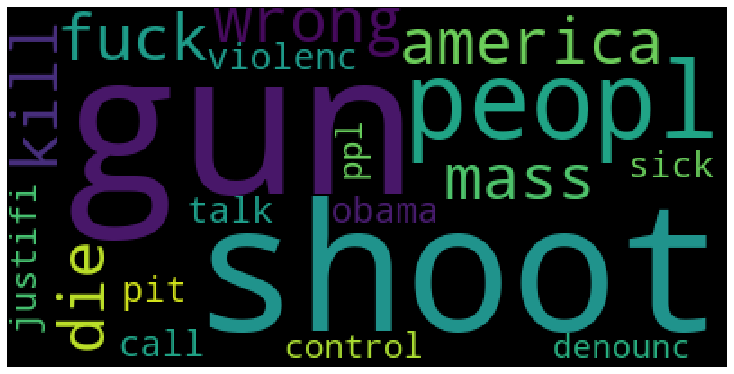

In [57]:
word="hate"


if word in words:
    str1=""
    for i in model.wv.most_similar(word,topn=20):
        str1+=" " + i[0]+ " "

    wordcloud = WordCloud().generate(str1) 
    plt.figure(figsize=(10,7)) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

else:
    print("word not in vocabulary") 

In [21]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_df.tweet)

vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

Total words 45890


In [26]:
tokenizer.word_index

{'user': 1,
 'the': 2,
 'to': 3,
 'a': 4,
 'i': 5,
 'you': 6,
 'and': 7,
 'in': 8,
 'for': 9,
 'of': 10,
 'is': 11,
 'my': 12,
 'love': 13,
 'this': 14,
 'on': 15,
 'with': 16,
 'it': 17,
 'be': 18,
 'day': 19,
 'so': 20,
 'all': 21,
 'are': 22,
 'that': 23,
 'me': 24,
 'amp': 25,
 'your': 26,
 'happy': 27,
 'at': 28,
 'have': 29,
 'am': 30,
 'just': 31,
 'we': 32,
 'will': 33,
 'when': 34,
 'not': 35,
 'do': 36,
 'u': 37,
 'â\x80¦': 38,
 'time': 39,
 'life': 40,
 'but': 41,
 'what': 42,
 "it's": 43,
 'from': 44,
 'like': 45,
 'up': 46,
 'today': 47,
 "i'm": 48,
 'now': 49,
 'new': 50,
 'thankful': 51,
 'out': 52,
 'as': 53,
 'positive': 54,
 'get': 55,
 'was': 56,
 'about': 57,
 'good': 58,
 'our': 59,
 'how': 60,
 'people': 61,
 'bihday': 62,
 'by': 63,
 'no': 64,
 'one': 65,
 'see': 66,
 'can': 67,
 "can't": 68,
 'they': 69,
 'more': 70,
 'smile': 71,
 'if': 72,
 'go': 73,
 'want': 74,
 "don't": 75,
 'take': 76,
 '2': 77,
 'work': 78,
 'who': 79,
 'healthy': 80,
 'weekend': 81,
 'fu

In [40]:
x_train = pad_sequences(tokenizer.texts_to_sequences(train_df.tweet), maxlen=SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_df.tweet), maxlen=SEQUENCE_LENGTH)

In [41]:
x_test.shape

(17197, 300)

In [43]:
labels = train_df.label.unique().tolist()
labels

[0, 1]

In [45]:
decode_map = {0: "NOT HATE", 1: "HATE"}
def decode_sentiment(label):
    return decode_map[int(label)]

train_df.label = train_df.label.apply(lambda x: decode_sentiment(x))



In [46]:
train_df

,label,tweet,tweet1
id,,,
1,NOT HATE,@user when a father is dysfunctional and is s...,user father dysfunct selfish drag kid dysfunct...
2,NOT HATE,@user @user thanks for #lyft credit i can't us...,user thank lyft credit use caus offer wheelcha...
3,NOT HATE,bihday your majesty,bihday majesti
4,NOT HATE,#model i love u take with u all the time in ...,model love u take u time ur
5,NOT HATE,factsguide: society now #motivation,factsguid societi motiv
...,...,...,...
31958,NOT HATE,ate @user isz that youuu?ðððððð...,ate user isz youuu
31959,NOT HATE,to see nina turner on the airwaves trying to...,see nina turner airwav tri wrap mantl genuin h...
31960,NOT HATE,listening to sad songs on a monday morning otw...,listen sad song monday morn otw work sad
